# Handwritten digits recognition

In [52]:
# Import keras library. 
from keras import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.noise import GaussianDropout

# Import the numpy library for matrix manipulations. 
from numpy import *

# Set up the graphics
import matplotlib.pyplot as plt
%matplotlib inline

# random number generator
rng = random.RandomState(23455)

import time

In [53]:
#Libraries
# Standard library
import pickle
import gzip

def load_data():
    
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='bytes')
    f.close()
    return (training_data, validation_data, test_data) 
    # read from the zip file (mnist.pkl.gz) 

def load_data_wrapper():
    global training_inputs, training_results
    global validation_inputs, validation_results
    global test_inputs, test_results
    global num_samples, numpixels, num_test_samples
    
    tr_d, va_d, te_d = load_data()
    
    num_samples=len(tr_d[0])
    training_inputs=zeros([num_samples,numpixels])
    training_results=zeros([num_samples,10])    
    for j in range(num_samples):
        training_inputs[j,:] = reshape(tr_d[0][j], (numpixels))
        training_results[j,:] = vectorized_result(tr_d[1][j])

    num_test_samples=len(te_d[0])
    test_inputs=zeros([num_test_samples,numpixels])
    test_results=zeros([num_test_samples,10])    
    for j in range(num_test_samples):
        test_inputs[j,:] = reshape(te_d[0][j], (numpixels))
        test_results[j,:] = vectorized_result(te_d[1][j])

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = zeros((10))
    e[j] = 1.0
    return e
# Loading data from 'mnist' to get vectorized results

In [54]:
# initialize the network
def init_net():
    global net, numpixels
    net = Sequential()
    net.add(Dense(30, input_shape=(numpixels,), activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1.0), metrics=['categorical_accuracy'])

In [55]:
# initialize the network
def init_net_large():
    global net, numpixels
    net = Sequential()
    net.add(Dense(100, input_shape=(numpixels,), activation='relu'))
    net.add(GaussianDropout(0.1)) 
    net.add(Dense(50, activation='relu'))
    net.add(Dense(10, activation='softmax'))
    net.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1.0), metrics=['categorical_accuracy'])

In [56]:
def test_on(start,stop,dontprint=False):
    global test_inputs, test_results
    global net, predictions_probs, predictions, true_labels
    
    predictions_probs=net.predict_on_batch(test_inputs[start:stop,:])
    predictions=argmax(predictions_probs,axis=1)
    if dontprint==False:
        print("Predictions: ", predictions)
    true_labels=argmax(test_results[start:stop,:], axis=1)
    if dontprint==False:
        print("True labels: ", true_labels)

In [57]:
def display_image(which):
    global test_inputs
    
    plt.imshow(reshape(test_inputs[which,:],[28,28]),interpolation='nearest', cmap='binary')
    plt.show()

In [58]:
def display_image_array(which):
    global test_inputs
    
    numcolumns=8
    BigImage=zeros([28*numcolumns,28*numcolumns])
    for j in range(len(which)):
        x=(j%numcolumns)*28
        y=int(j/numcolumns)*28
        BigImage[x:x+28,y:y+28]=reshape(test_inputs[which[j],:],[28,28])
    plt.imshow(BigImage,interpolation='nearest', cmap='binary')
    plt.show()

In [59]:
def display_mistakes(maxnum):
    global test_inputs, rest_results, num_test_samples
    global true_labels, predictions, predictions_probs
    
    test_on(0,num_test_samples,dontprint=True)
    which=where(true_labels!=predictions)[0]
    for j in which:
        if j<maxnum:
            display_image(j)
            print("True ", true_labels[j], " - Predicted ", predictions[j], " with prob. ", predictions_probs[j,predictions[j]])
        

In [60]:
numpixels=784
load_data_wrapper() # load all the MNIST images

In [61]:
shape(training_inputs)

(50000, 784)

In [62]:
init_net()

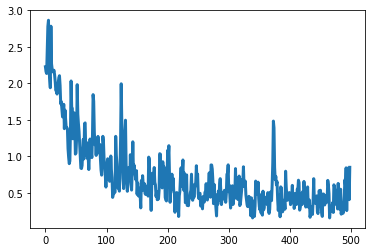

In [63]:
batchsize=100
batches=int(num_samples/batchsize)-1
costs=zeros(batches)
for j in range(batches):
    costs[j]=net.train_on_batch(training_inputs[j*batchsize:(j+1)*batchsize,:], training_results[j*batchsize:(j+1)*batchsize,:])[0]
plt.plot(costs,linewidth=3)
plt.show()

In [64]:
test_on(0,20)

Predictions:  [7 3 1 0 4 1 4 9 4 7 0 6 9 0 1 5 9 7 3 4]
True labels:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [65]:
# use the keras "fit" function to go through the whole data set many times ('epochs'), 
history=net.fit(training_inputs,training_results,batch_size=100,
                epochs=30,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 1s 17us/step - loss: 0.3486 - categorical_accuracy: 0.8998 - val_loss: 0.3669 - val_categorical_accuracy: 0.8910
Epoch 2/30
45000/45000 [==============================] - 1s 16us/step - loss: 0.3016 - categorical_accuracy: 0.9136 - val_loss: 0.3808 - val_categorical_accuracy: 0.8874
Epoch 3/30
45000/45000 [==============================] - 1s 14us/step - loss: 0.2704 - categorical_accuracy: 0.9215 - val_loss: 0.3266 - val_categorical_accuracy: 0.9094
Epoch 4/30
45000/45000 [==============================] - 1s 15us/step - loss: 0.2588 - categorical_accuracy: 0.9245 - val_loss: 0.3062 - val_categorical_accuracy: 0.9162
Epoch 5/30
45000/45000 [==============================] - 1s 18us/step - loss: 0.2437 - categorical_accuracy: 0.9284 - val_loss: 0.3079 - val_categorical_accuracy: 0.9140
Epoch 6/30
45000/45000 [==============================] - 1s 15us/step - loss: 0.2341 - categori

In [66]:
# see which fraction of the test samples is classified incorrectly
test_on(0,num_test_samples,dontprint=True)
which=where(true_labels!=predictions)[0]
print(len(which)/num_test_samples)

0.0553


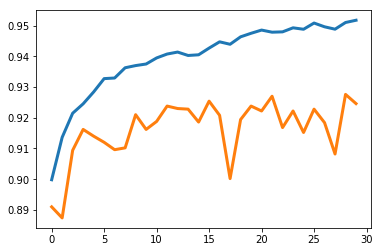

In [67]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()

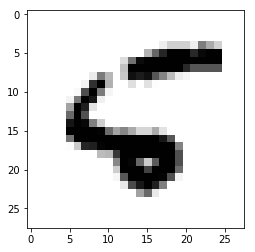

True  5  - Predicted  6  with prob.  0.7792102


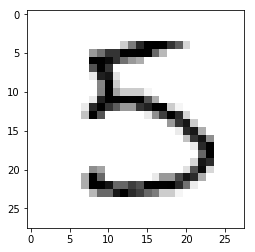

True  5  - Predicted  3  with prob.  0.52887756


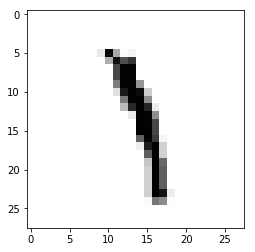

True  1  - Predicted  9  with prob.  0.9534416


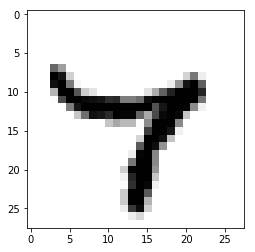

True  7  - Predicted  4  with prob.  0.9629426


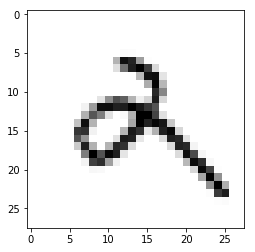

True  2  - Predicted  3  with prob.  0.7646982


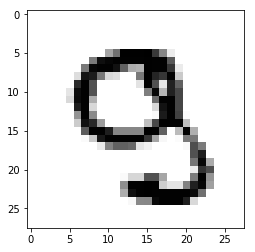

True  9  - Predicted  8  with prob.  0.9342753


In [68]:
display_mistakes(200) 

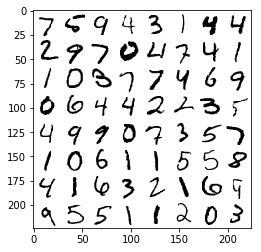

In [69]:
display_image_array(range(8*8))